<a href="https://colab.research.google.com/github/Segrey372017/pytorch_fatsai_sandbox/blob/main/pytorch_fastai_sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Глава 1. Путешествие в мир глубокого обучения

### Ваша первая модель (cats vs dogs)

https://course.fast.ai/Resources/book.html


In [ ]:
from fastai.vision.all import *
from fastai.tabular.all import *
from fastai.collab import *


In [ ]:
import ipywidgets as widgets
import dill
from pathlib import Path

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
path = untar_data(URLs.PETS, '/images')

In [ ]:
def is_cat(x):
    return x[0].isupper()

In [ ]:
dls = ImageDataLoaders.from_name_func(path, get_image_files(path), 
                                      valid_pct = 0.2, seed = 42,
                                      label_func = is_cat, item_tfms = Resize(224))

In [ ]:
learn = vision_learner(dls, resnet34, metrics = error_rate)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
#learn.fine_tune(1)

In [ ]:
#with open("learn_cats_dogs.pkl", "wb") as f:
#    pickle.dump(learn, f)

In [ ]:
learn2 = None
with open('/content/drive/MyDrive/Colab Notebooks/learn_cats_dogs.pkl', "rb") as f:
    learn2 = pickle.load(f)

In [ ]:
del learn

In [ ]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(upload.data[0])

In [ ]:
is_cat, _, prob = learn2.predict(img)
print(f"Is this a cat? {is_cat}")
print(f"Cat probability {prob[1].item():0.6f}")

Is this a cat? True
Cat probability 0.999944


### Сегментация изображения

In [ ]:
path = untar_data(URLs.CAMVID_TINY, '/content/camvid_tiny')

In [ ]:
path

Path('/root/.fastai/data/camvid_tiny')

In [ ]:
dls = SegmentationDataLoaders.from_label_func(path, bs = 8, 
                                              fnames = get_image_files(path/'images'), # перегружен оператор / можно без конкатенации
                                              label_func = lambda o: path /"labels"/f"{o.stem}_P{o.suffix}",
                                              codes = np.loadtxt(path /'codes.txt', dtype = 'str'))

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1121: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


In [ ]:
learn = unet_learner(dls, resnet34)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1121: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The cur

In [ ]:
#learn.fine_tune(4)

epoch,train_loss,valid_loss,time
0,2.848903,2.458210,01:13


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1121: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,time
0,1.813387,1.490754,01:16
1,1.547214,1.163790,01:19
2,1.365776,1.008272,01:15
3,1.237163,0.932938,01:17


In [ ]:
#with open("/content/drive/MyDrive/Colab Notebooks/learn_segm.dill", "wb") as f:
# dill.dump(learn, f)

In [ ]:
learn2 = None
with open("/content/drive/MyDrive/Colab Notebooks/learn_segm.dill", "rb") as f:
    learn2 = dill.load(f)

In [ ]:
#del learn

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1121: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


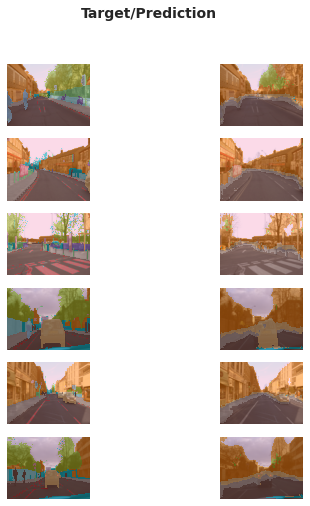

In [ ]:
learn2.show_results(max_n = 6, figsize=(7,8))

### Табличные данные (уровень дохода)

In [ ]:
#from fastai.tabular import *

In [ ]:
path = untar_data(URLs.ADULT_SAMPLE, '/content/adult_sample')

In [ ]:
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

In [ ]:
learn = tabular_learner(dls, metrics = accuracy)

In [ ]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.381589,0.357553,0.840295,00:05
1,0.367507,0.353663,0.836609,00:05
2,0.358220,0.342677,0.839527,00:05


# Глава 2. От модели к продакшену

### Классификация изображений (pizza - not_pizza)

In [ ]:
path = Path('/content/drive/MyDrive/datasets/pizza_not_pizza')

In [ ]:
pizza = DataBlock(blocks = (ImageBlock, CategoryBlock),
                  get_items = get_image_files,
                  splitter = RandomSplitter(valid_pct= 0.2, seed = 42),
                  get_y = parent_label,
                  item_tfms= Resize(128))

In [ ]:
dls = pizza.dataloaders(path)

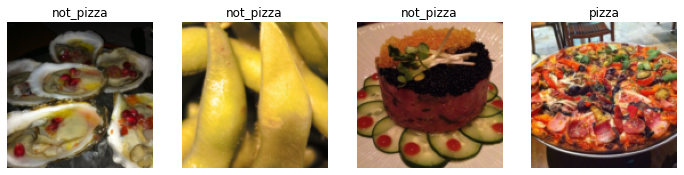

In [ ]:
dls.valid.show_batch(max_n = 4, nrows = 1)

In [ ]:
pizza = pizza.new(
    item_tfms= RandomResizedCrop(224, min_scale=0.5),
    batch_tfms= aug_transforms()
)

In [ ]:
dls = pizza.dataloaders(path)

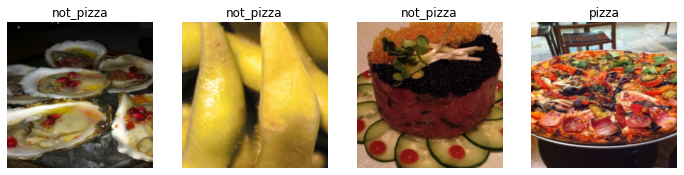

In [ ]:
dls.valid.show_batch(max_n = 4, nrows = 1)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics = error_rate)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download

  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
#learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.712797,0.284371,0.075802,04:17


epoch,train_loss,valid_loss,error_rate,time
0,0.343811,0.237159,0.087464,05:23
1,0.309996,0.177761,0.055394,05:23
2,0.245414,0.144399,0.040816,05:24
3,0.201458,0.141617,0.046647,05:23


In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/learn_pizza.dill', 'wb') as f:
    dill.dump(learn, f)

In [ ]:
del learn

In [ ]:
learn_p = None
with open('/content/drive/MyDrive/Colab Notebooks/learn_pizza.dill', 'rb') as f:
    learn_p = dill.load(f)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn_p)

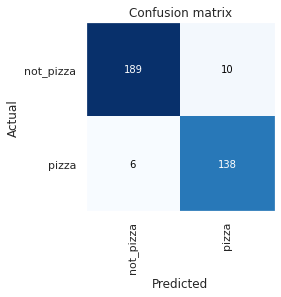

In [ ]:
interp.plot_confusion_matrix()

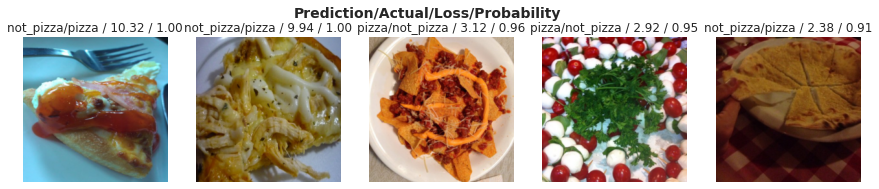

In [ ]:
interp.plot_top_losses(5, nrows = 1)

In [ ]:
learn_p.predict('/content/drive/MyDrive/datasets/pizza_valid/some_pizza.jpg') # должен распознать как pizza

('pizza', TensorBase(1), TensorBase([1.4771e-08, 1.0000e+00]))

In [ ]:
# яичница очень похожа на пиццу, справится ли
learn_p.predict('/content/drive/MyDrive/datasets/pizza_valid/some_eggs.jpg') # должен распознать как not_pizza

('not_pizza', TensorBase(0), TensorBase([0.6765, 0.3235]))

Справился но вероятность 67% против 32%

In [ ]:
img = PILImage.create('/content/drive/MyDrive/datasets/pizza_valid/some_eggs.jpg')

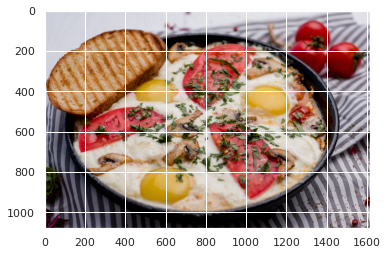

In [ ]:
plt.imshow(img)

# Глава 4. Обучение классификатора цифр. Взгляд изнутри

### Набор MNIST

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE,'/content/MNIST')

In [ ]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/valid')]

In [ ]:
(path / 'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

In [ ]:
trees = (path / 'train' / '3').ls().sorted()
sevens = (path / 'train'/ '7').ls().sorted()

In [ ]:
trees

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [ ]:
img_path = trees[1]

In [ ]:
img3 = Image.open(img_path)

In [ ]:
img3

In [ ]:
# Преобразование в массив numpy
np.array(img3)[4:10, 4:10] # извлекатся срез 4х10

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [ ]:
# преобразование в тензр Pytorch
tensor(img3)[4:10, 4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [ ]:
img_3t = tensor(img3)

In [ ]:
df = pd.DataFrame(data = img_3t[4:15, 4:22])

In [ ]:
df.style.set_properties(**{'font_size': '6pt'}).background_gradient("Greys")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [ ]:
# Базовая модель (сходство пикселей)
seven_tensors = [tensor(Image.open(o)) for o in sevens]
thres_tensors = [tensor(Image.open(o)) for o in trees]

In [ ]:
len(seven_tensors), len(thres_tensors)

(6265, 6131)

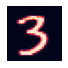

In [ ]:
show_image(thres_tensors[1])

In [ ]:
# упаковка изображений в трехмерный тензор
stacked_sevens = torch.stack(seven_tensors).float() / 255
stacked_threes = torch.stack(thres_tensors).float() / 255

In [ ]:
stacked_threes.shape

torch.Size([6131, 28, 28])

<h3>ВАЖНО!!! </h3>
<h3> <i><b> Ранг -</i></b>  колличество осей в тензоре </h3>
<h3> <i><b> Форма (shape) -</i></b>  размер каждой оси тензора </h3>

In [ ]:
# ранг тензора
stacked_sevens.ndim

3

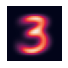

In [ ]:
# идеальная цифра 3 (усредненное значение каждого пикселя из датасета)
mean3 = stacked_threes.mean(0)
show_image(mean3)

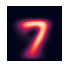

In [ ]:
# "идеальная семерка"
mean7 = stacked_sevens.mean(0)
show_image(mean7)

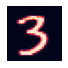

In [ ]:
a_3 = stacked_threes[1]
show_image(a_3)

In [ ]:
# оценка меры L1 и L2 (расстояние между идеальной цифрой 3 и одим из вариантов написания)
dist3_abs = (a_3 - mean3).abs().mean()
dist3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist3_abs, dist3_sqr

(tensor(0.1114), tensor(0.2021))

In [ ]:
dist7_abs = (a_3 - mean7).abs().mean()
dist7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist7_abs, dist7_sqr
# ожидаемо что случайная трока оказалас дальше от идеальной семерки чем от идеальной тройки

(tensor(0.1586), tensor(0.3021))

### Случайный градиентный спуск (SGD)

In [ ]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [ ]:
train_y = tensor([1]*len(trees)+[0]*len(sevens)).unsqueeze(1)

In [ ]:
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [ ]:
dset = list(zip(train_x,train_y))

In [ ]:
x,y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [ ]:
valid3_tens = torch.stack([tensor(Image.open(o)) for o in (path / 'valid'/'3').ls()])
valid7_tens = torch.stack([tensor(Image.open(o)) for o in (path/ 'valid'/ '7').ls()])

valid3_tens = valid3_tens.float() / 255
valid7_tens = valid7_tens.float() / 255

In [ ]:
valid3_tens.shape, valid7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [ ]:
# набор валидационных данных
valid_x = torch.cat([valid3_tens, valid7_tens]).view(-1, 28*28)

In [ ]:
valid_y = tensor([0]*len(valid3_tens)+[1]*len(valid7_tens)).unsqueeze(1)

In [ ]:
valid_dset = list(zip(valid_x, valid_y))

In [ ]:
# инициализация весов случайными значениями
def init_params(size, std = 1.0):
    return (torch.randn(size)*std).requires_grad_()

In [ ]:
weights = init_params((28*28,1))
bias = init_params(1)

In [ ]:
(train_x[0]*weights.T).sum() + bias

tensor([-9.0795], grad_fn=<AddBackward0>)

In [ ]:
def linear1(xb, weights, bias):
    return xb@weights+bias

In [ ]:
preds = linear1(train_x, weights, bias)
preds

tensor([[ -9.0796],
        [-16.4581],
        [ -3.5531],
        ...,
        [ -3.8017],
        [  1.3042],
        [  0.4215]], grad_fn=<AddBackward0>)

In [ ]:
corrects = (preds > 0).float() == train_y

In [ ]:
corrects

tensor([[False],
        [False],
        [False],
        ...,
        [ True],
        [False],
        [False]])

In [ ]:
corrects.float().mean().item()

0.4496611952781677

In [ ]:
# изменяем веса на небольшое значение
with torch.no_grad(): weights[0] *= 1.0001

In [ ]:
preds = linear1(train_x, weights, bias)
((preds>0.0).float() == train_y).float().mean().item()

0.4496611952781677

In [ ]:
# функция потерь
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets == 1, 1 - predictions, predictions).mean()

In [ ]:
def batch_accuracy(xb, yb): 
    """
    Функция вычисления точности предсказания по пакету данных
    """
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [ ]:
dl = DataLoader(dset, batch_size= 256)
valid_dl = DataLoader(valid_dset, bath_size = 256)

In [ ]:
dls = DataLoaders(dl, valid_dl)

In [ ]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [ ]:
learn.fit(10, lr =1.0)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.637028,0.496581,0.504416,00:02
1,0.508366,0.791275,0.183513,00:02
2,0.187574,0.832968,0.150638,00:02
3,0.082552,0.898383,0.085869,00:02
4,0.043865,0.924914,0.065751,00:02
5,0.028745,0.939421,0.051521,00:02
6,0.022519,0.948460,0.044652,00:02
7,0.019739,0.954488,0.037782,00:02
8,0.018322,0.958750,0.033857,00:02
9,0.017469,0.961911,0.031894,00:02


In [ ]:
# Простая нейронная сеть
simple_net = nn.Sequential(
    nn.Linear(28*28, 30),
    nn.ReLU(),
    nn.Linear(30, 1)
)

In [ ]:
learn = Learner(dls, simple_net, opt_func = SGD,
                loss_func = mnist_loss, metrics = batch_accuracy)

In [ ]:
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.316777,0.591344,0.495093,00:02
1,0.147824,0.772411,0.194308,00:02
2,0.081682,0.885314,0.083415,00:02
3,0.053551,0.922033,0.060353,00:02
4,0.040536,0.938897,0.045633,00:02
5,0.033903,0.948447,0.035819,00:02
6,0.030106,0.954514,0.034838,00:02
7,0.027643,0.958668,0.033366,00:02
8,0.025871,0.961698,0.031894,00:03
9,0.024497,0.964008,0.028950,00:02


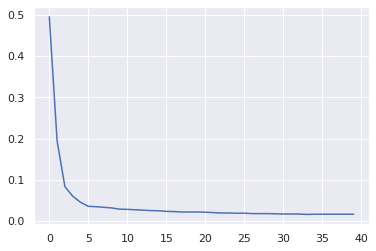

In [ ]:
plt.plot(L(learn.recorder.values).itemgot(2)) # кривая обучения

In [ ]:
# результат последней эпохи обучения
learn.recorder.values[-1][1]

0.9791644215583801

# Глава 5. Классификация изображений

### От собак и кошек к породам домашних животных

In [ ]:
path = untar_data(URLs.PETS, '/content/PETS')

In [ ]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [ ]:
(path /'images').ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/Bombay_202.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_40.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_setter_53.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_123.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_187.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_setter_135.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_70.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bombay_9.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_51.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bombay_83.jpg')...]

In [ ]:
fname = (path / 'images').ls()[0]
fname.name

'Bombay_202.jpg'

In [ ]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['Bombay']

In [ ]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))

In [ ]:
dls = pets.dataloaders(path / 'images')

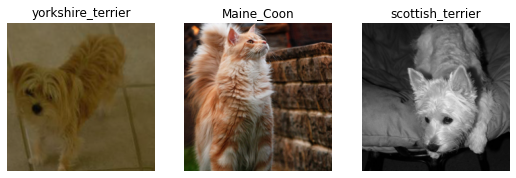

In [ ]:
dls.show_batch(nrows = 1, ncols = 3)

In [ ]:
pets.summary(path / 'images')

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/beagle_19.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x334
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/beagle_19.jpg
    applying partial gives
      beagle
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(15)

Final sample: (PILImage mode=RGB size=500x334, TensorCategory(15))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: 

In [ ]:
learn = cnn_learner(dls, resnet34, metrics = error_rate)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.508530,0.349226,0.113667,36:51


epoch,train_loss,valid_loss,error_rate,time
0,0.496899,0.308766,0.102165,52:13
1,0.316383,0.269876,0.081867,52:27


In [ ]:
x, y = dls.one_batch()

In [ ]:
y

TensorCategory([ 6,  7, 31, 34,  4, 22,  2, 32, 20, 15,  4, 22,  8, 30, 31, 14,
                20,  3, 22, 22, 27,  4, 24, 24, 29, 24, 26, 32, 18,  3, 23, 27,
                25,  3, 21,  8, 27, 17, 12, 12, 31, 17,  1, 16,  2, 12, 14,  0,
                34, 19, 13, 10, 14,  1, 10, 23, 30, 20, 22, 36, 20, 11, 19, 33])

In [ ]:
preds, _ = learn.get_preds(dl = [(x,y)])

In [ ]:
preds[0].sum()

TensorBase(1.0000)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

# Глава 6. Другие задачи компьютерного зрения

### Многоклассовая классификация

In [ ]:
path = untar_data(URLs.PASCAL_2007, '/content/drive/MyDrive/PASCAL_2007')

In [ ]:
df = pd.read_csv(path / 'train.csv')
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [ ]:
# построение набора данных - Объект Datablock
dblock = DataBlock()

In [ ]:
dsets = dblock.datasets(df)

In [ ]:
dsets.train[0]

(fname             002585.jpg
 labels      person motorbike
 is_valid                True
 Name: 1296, dtype: object, fname             002585.jpg
 labels      person motorbike
 is_valid                True
 Name: 1296, dtype: object)

In [ ]:
# разделение набора на признаки и целевую переменную
dblock = DataBlock(get_x= lambda r: r['fname'], get_y= lambda r: r['labels']) # из датафрейма r бурем соответствующие Series
dsets = dblock.datasets(df)
dsets.train[0]

('008091.jpg', 'boat person')

In [ ]:
def get_x(r): 
    return path/'train'/r['fname']

def get_y(r):
    return r['labels'].split(' ')

In [ ]:
dblock = DataBlock(get_x = get_x, get_y = get_y)
dsets = dblock.datasets(df)

In [ ]:
dsets.train[0]

(Path('/root/.fastai/data/pascal_2007/train/000321.jpg'), ['person'])

In [ ]:
dblock = DataBlock(blocks = (ImageBlock, MultiCategoryBlock),
                   get_x = get_x, get_y = get_y)

In [ ]:
dsets = dblock.datasets(df)
dsets.train[0]

(PILImage mode=RGB size=375x500,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0.]))

In [ ]:
def splitter(df):
    """
    Правило разделения датафрема на контрольный и проверочный

    """
    train = df.index[~df['is_valid']].tolist()
    valid = df.index[df['is_valid']].tolist()
    return train, valid

In [ ]:
dblock = DataBlock(blocks = (ImageBlock, MultiCategoryBlock), 
                   splitter = splitter,
                   get_x = get_x, get_y= get_y)

In [ ]:
dsets = dblock.datasets(df)
dsets.train[0]

(PILImage mode=RGB size=500x333,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0.]))

In [ ]:
dblock = DataBlock(blocks = (ImageBlock, MultiCategoryBlock), 
                   splitter = splitter,
                   get_x = get_x, get_y= get_y,
                   item_tfms= RandomResizedCrop(128, min_scale = 0.35))

In [ ]:
dls = dblock.dataloaders(df)

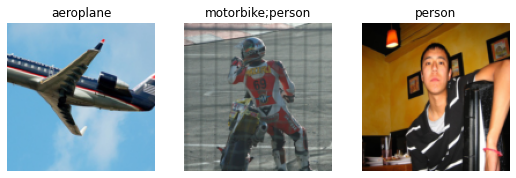

In [ ]:
dls.show_batch(nrows = 1, ncols = 3)

In [ ]:
# Перекрестная энтропия
learn = vision_learner(dls, arch= resnet18)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
x,y = dls.train.one_batch()
activs = learn.model(x)
activs.shape

torch.Size([64, 20])

In [ ]:
activs[0]

TensorBase([ 3.0878,  0.5948,  1.3796,  0.6932, -0.8748,  2.0466,  1.1247,
            -1.0372, -2.4165,  2.6728,  3.1062, -1.0075, -0.6137,  1.4598,
             2.2315, -1.5557, -0.0686, -0.7999, -1.3255, -1.6845],
           grad_fn=<AliasBackward0>)

In [ ]:
def binary_cross_entropy(inputs, targets):
    inputs = inputs.sigmoid()
    return -1*torch.where(targets == 1, inputs, 1-inputs).log().mean()

In [ ]:
# Выбор подходящей функции потери
loss_func = nn.BCEWithLogitsLoss()

In [ ]:
loss = loss_func(activs, y)

In [ ]:
loss

TensorMultiCategory(1.0901, grad_fn=<AliasBackward0>)

In [ ]:
#learn = vision_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
#learn.fine_tune(3, base_lr=3e-3, freeze_epochs=4)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.944923,0.703008,0.234104,09:55
1,0.821678,0.552301,0.292470,10:01
2,0.600180,0.202414,0.811773,10:07
3,0.359105,0.128074,0.932271,09:55


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.133772,0.115125,0.945797,12:43
1,0.116859,0.106023,0.951175,12:34
2,0.095952,0.101771,0.954004,12:45


In [ ]:
#with open('/content/drive/MyDrive/Colab Notebooks/learn_part6.dill', 'wb') as f:
#    dill.dump(learn, f)

In [ ]:
learn = None
with open('/content/drive/MyDrive/Colab Notebooks/learn_part6.dill', 'rb') as f:
    learn = dill.load(f)

In [ ]:
learn.metrics = partial(accuracy_multi, thresh = 0.1)
learn.validate()

(#2) [0.10177073627710342,0.9350597858428955]

In [ ]:
learn.metrics = partial(accuracy_multi, thresh = 0.99)
learn.validate()

(#2) [0.10177073627710342,0.9437249898910522]

In [ ]:
preds, targs = learn.get_preds()

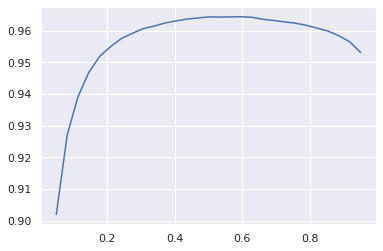

In [ ]:
xs = torch.linspace(0.05, 0.95, 29)
accs = [accuracy_multi(preds, targs, thresh = i, sigmoid = False) for i in xs]
plt.plot(xs, accs)

### Регрессия

In [ ]:
path = untar_data(URLs.BIWI_HEAD_POSE, '/content/datasets')

In [ ]:
path.ls()

(#50) [Path('/root/.fastai/data/biwi_head_pose/03'),Path('/root/.fastai/data/biwi_head_pose/08'),Path('/root/.fastai/data/biwi_head_pose/18'),Path('/root/.fastai/data/biwi_head_pose/13.obj'),Path('/root/.fastai/data/biwi_head_pose/10'),Path('/root/.fastai/data/biwi_head_pose/23'),Path('/root/.fastai/data/biwi_head_pose/readme.txt'),Path('/root/.fastai/data/biwi_head_pose/22'),Path('/root/.fastai/data/biwi_head_pose/18.obj'),Path('/root/.fastai/data/biwi_head_pose/14')...]

In [ ]:
(path / '01').ls()

(#1000) [Path('/root/.fastai/data/biwi_head_pose/01/frame_00442_rgb.jpg'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00007_pose.txt'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00199_rgb.jpg'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00134_rgb.jpg'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00056_pose.txt'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00302_pose.txt'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00458_pose.txt'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00142_rgb.jpg'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00408_rgb.jpg'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00250_rgb.jpg')...]

In [ ]:
img_files = get_image_files(path)

In [ ]:
def img2pose(x):
    return Path(f'{str(x)[:-7]}pose.txt')

In [ ]:
img2pose(img_files[0])

Path('/root/.fastai/data/biwi_head_pose/03/frame_00442_pose.txt')

In [ ]:
# взглянем на первое изображение 
img = PILImage.create(img_files[0])
img.shape

(480, 640)

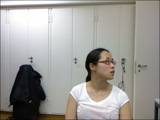

In [ ]:
img.to_thumb(160)

In [ ]:
cal = np.genfromtxt(path/'01'/'rgb.cal', skip_footer=6)
def get_ctr(f):
    ctr = np.genfromtxt(img2pose(f), skip_header=3)
    c1 = ctr[0] * cal[0][0]/ctr[2] + cal[0][2]
    c2 = ctr[1] * cal[1][1]/ctr[2] + cal[1][2]
    return tensor([c1,c2])

In [ ]:
get_ctr(img_files[0])

tensor([437.3673, 258.3427])

In [ ]:
# формирование DataBlock
biwi = DataBlock(
    blocks=(ImageBlock, PointBlock),
    get_items=get_image_files,
    get_y=get_ctr,
    splitter=FuncSplitter(lambda o: o.parent.name=='13'),
    batch_tfms=aug_transforms(size=(240,320)), 
)

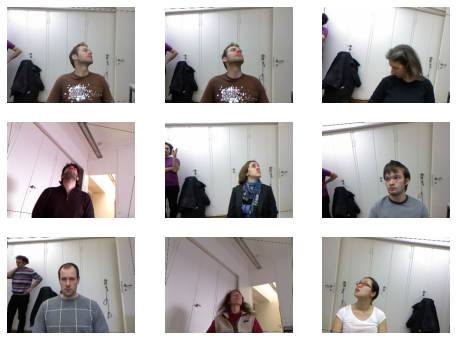

In [ ]:
# проверяем правильность подготовки данных
dls = biwi.dataloaders(path)
dls.show_batch(max_n = 9, figsize = (8, 6))

In [ ]:
# числовове представление данных
xb, yb = dls.one_batch()
xb.shape, yb.shape

(torch.Size([64, 3, 240, 320]), torch.Size([64, 1, 2]))

In [ ]:
yb[0]

TensorPoint([[-0.0316,  0.2690]], device='cuda:0')

In [ ]:
learn = vision_learner(dls, resnet18, y_range= (-1,1))

In [ ]:
dls.loss_func

FlattenedLoss of MSELoss()

SuggestedLRs(valley=0.0008317637839354575)

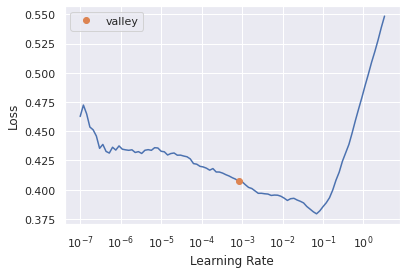

In [ ]:
learn.lr_find()

In [ ]:
lr= 2e-2

In [ ]:
learn.fit_one_cycle(5, lr)

epoch,train_loss,valid_loss,time
0,0.046292,0.071595,01:56
1,0.006401,0.001932,01:52
2,0.003065,0.003824,01:54
3,0.002162,0.002491,01:56
4,0.001542,0.000811,01:55


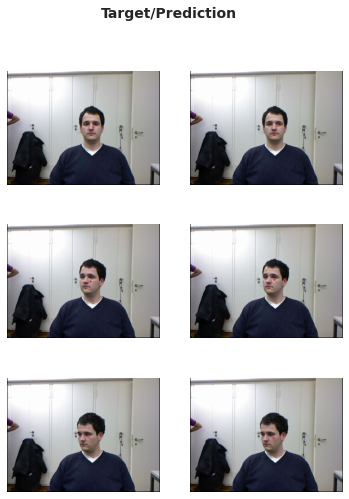

In [ ]:
learn.show_results(ds_idx=1, max_n=3, figsize=(6,8))

# Глава 7. Обучение современой модели

### Обучение базовой модели

In [ ]:
path = untar_data(URLs.IMAGENETTE, '/content/datasets')

In [ ]:
dblock = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
                   get_items=get_image_files,
                   get_y=parent_label,
                   item_tfms=Resize(460),
                   batch_tfms=aug_transforms(size=224, min_scale=0.75))

In [ ]:
dls = dblock.dataloaders(path, bs=64)

In [ ]:
model = xresnet50()

In [ ]:
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)

In [ ]:
learn.fit_one_cycle(5, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.653155,2.677132,0.396191,03:03
1,1.280290,1.176303,0.605302,02:52
2,0.954936,1.521115,0.629201,02:48
3,0.749378,0.675959,0.788275,02:47
4,0.600367,0.561815,0.819268,02:47


### Нормализация

In [ ]:
# приведение входных данных к 0 среднему и 1 стандартному отклонению
x, y = dls.one_batch()

In [ ]:
x.mean(dim = [0,2,3]), x.std(dim = [0,2,3])

(TensorImage([0.4606, 0.4451, 0.4101], device='cuda:0'),
 TensorImage([0.2907, 0.2819, 0.2991], device='cuda:0'))

In [ ]:
def get_dls(bs, size):
    dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                       get_items=get_image_files,
                       get_y=parent_label,
                       item_tfms=Resize(460),
                       batch_tfms=[*aug_transforms(size=size, min_scale=0.75),
                       Normalize.from_stats(*imagenet_stats)])
    return dblock.dataloaders(path, bs=bs)

In [ ]:
dls = get_dls(64, 224)

In [ ]:
x, y = dls.one_batch()

In [ ]:
x.mean(dim = [0,2,3]), x.std(dim = [0,2,3])

(TensorImage([-0.0566,  0.0886,  0.2008], device='cuda:0'),
 TensorImage([1.2489, 1.2493, 1.3322], device='cuda:0'))

In [ ]:
model = xresnet50()
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
learn.fit_one_cycle(5, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.648628,1.980371,0.463032,02:46
1,1.286827,1.371897,0.545556,02:47
2,0.969892,0.957845,0.686706,02:50
3,0.766521,0.633443,0.796863,02:47
4,0.622649,0.556949,0.827110,02:48


### Прогрессивное изменение размера

In [ ]:
# обучение на картинках меньшего размера
dls = get_dls(128, 128)

In [ ]:
learn = Learner(dls, xresnet50(), loss_func=CrossEntropyLossFlat(),
metrics=accuracy)

In [ ]:
# базовое обучение модели на меньшем числе эпох
learn.fit_one_cycle(4, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.794721,3.085715,0.383869,02:19
1,1.293317,1.182819,0.622479,02:13
2,0.987215,1.046251,0.662808,02:13
3,0.759426,0.689062,0.779686,02:47


In [ ]:
# замена dls, для дообучения модели на изображениях большего размера
learn.dls = get_dls(64, 224)

In [ ]:
learn.fine_tune(5, 1e-3) # дообучение модели более низкой скоростью обучения

epoch,train_loss,valid_loss,accuracy,time
0,0.850785,1.235444,0.643017,02:54


epoch,train_loss,valid_loss,accuracy,time
0,0.683765,0.700322,0.783420,02:44
1,0.671769,0.700327,0.778193,02:47
2,0.632832,0.605242,0.820015,02:43
3,0.493619,0.504227,0.852875,02:43
4,0.447531,0.452975,0.864824,03:00


### Аугментация во время тестирования (TTA)

In [ ]:
preds, targs = learn.tta()
accuracy(preds, targs).item()

0.8678117990493774

### Mixup

In [ ]:
model = xresnet50()

In [ ]:
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(),
metrics=accuracy, cbs=MixUp) # применяем MixUp через параметр cbs

In [ ]:
learn.fit_one_cycle(5, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.149174,3.831152,0.326363,02:17
1,1.701552,1.880540,0.426438,02:14
2,1.444201,1.197369,0.639283,02:16
3,1.294481,0.811736,0.752427,02:14
4,1.194151,0.724427,0.781180,02:14


# Глава 8. Колаборативная фильтрация

### Первый взгляд на данные

In [ ]:
path = untar_data(URLs.ML_100k, '/content/datasets')

In [ ]:
raitings = pd.read_csv(path / 'u.data', delimiter = '\t', header = None, 
                       names = ['user', 'movie', 'rating', 'timestamp'])

In [ ]:
# raitings.head()

### Создание DataLoaders

In [ ]:
movies = pd.read_csv(path/'u.item', delimiter='|', encoding='latin-1',
usecols=(0,1), names=('movie','title'), header=None)

In [ ]:
movies.head(10)

,movie,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


In [ ]:
raitings = raitings.merge(movies)
raitings.head()

,user,movie,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [ ]:
dls = CollabDataLoaders.from_df(raitings, item_name = 'title', bs = 64)
dls.show_batch()

,user,title,rating
0,85,High Noon (1952),4
1,223,Jack (1996),3
2,85,Arsenic and Old Lace (1944),4
3,476,Young Guns (1988),3
4,761,Ghost (1990),3
5,363,Rear Window (1954),4
6,472,Demolition Man (1993),5
7,186,"Long Kiss Goodnight, The (1996)",4
8,749,Dirty Dancing (1987),2
9,768,Father of the Bride Part II (1995),3


In [ ]:
x, y = dls.one_batch()

In [ ]:
n_users = len(dls.classes['user'])
n_movies = len(dls.classes['title'])
n_factors = 5

In [ ]:
x.shape

torch.Size([64, 2])

In [ ]:
# класс для скалярного произведения
class DotProduct(Module):
     def __init__(self, n_users, n_movies, n_factors):
          self.user_factors = Embedding(n_users, n_factors)
          self.movie_factors = Embedding(n_movies, n_factors)
          return
     def forward(self, x):
          users = self.user_factors(x[:,0])
          movies = self.movie_factors(x[:,1])
          return (users * movies).sum(dim=1)

In [ ]:
model = DotProduct(n_users, n_movies, 50)

In [ ]:
learn = Learner(dls, model, loss_func=MSELossFlat())

In [ ]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,1.335736,1.300845,00:07
1,1.069253,1.053946,00:07
2,0.921767,0.945969,00:06
3,0.809858,0.869672,00:07
4,0.765575,0.854151,00:07


In [ ]:
class DotProduct(Module):
    def __init__(self, n_users, n_movies, n_factors, y_range=(0,5.5)):
        self.user_factors = Embedding(n_users, n_factors)
        self.movie_factors = Embedding(n_movies, n_factors)
        self.y_range = y_range
        return

    def forward(self, x):
        users = self.user_factors(x[:,0])
        movies = self.movie_factors(x[:,1])
        return sigmoid_range((users * movies).sum(dim=1), *self.y_range)

In [ ]:
model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.975939,0.986653,00:07
1,0.877893,0.893904,00:07
2,0.699534,0.856159,00:07
3,0.453472,0.864543,00:07
4,0.378427,0.869297,00:07


In [ ]:
class DotProductBias(Module):
    def __init__(self, n_users, n_movies, n_factors, y_range=(0,5.5)):
        self.user_factors = Embedding(n_users, n_factors)
        self.user_bias = Embedding(n_users, 1)
        self.movie_factors = Embedding(n_movies, n_factors)
        self.movie_bias = Embedding(n_movies, 1)
        self.y_range = y_range
        return

    def forward(self, x):
        users = self.user_factors(x[:,0])
        movies = self.movie_factors(x[:,1])
        res = (users * movies).sum(dim=1, keepdim=True)
        res += self.user_bias(x[:,0]) + self.movie_bias(x[:,1])
        return sigmoid_range(res, *self.y_range)

In [ ]:
model = DotProductBias(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.952708,0.937930,00:07
1,0.882885,0.868412,00:07
2,0.730358,0.827364,00:10
3,0.576868,0.813911,00:08
4,0.484213,0.813980,00:08


### Использование fast.ai Colab

In [ ]:
learn = collab_learner(dls, n_factors = 50, y_range = (0.0, 5.5))
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.957235,0.926847,00:09
1,0.836794,0.864944,00:07
2,0.602112,0.856876,00:07
3,0.398836,0.880713,00:08
4,0.294328,0.887851,00:07


In [ ]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 50)
  (i_weight): Embedding(1665, 50)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1665, 1)
)

# Глава 9. Табличное моделирование

### Синяя книга бульдозеров

In [ ]:
path = Path('/content/drive/MyDrive/datasets/Buldozers/bluebook-for-bulldozers.zip')

In [ ]:
import zipfile

In [ ]:
str(path)

'/content/drive/MyDrive/datasets/Buldozers/bluebook-for-bulldozers.zip'

In [ ]:
z = zipfile.ZipFile(path, 'r')

In [ ]:
z.extractall()

In [ ]:
path = Path('/content')

In [ ]:
path.ls(file_type = 'text')

(#7) [Path('/content/random_forest_benchmark_test.csv'),Path('/content/median_benchmark.csv'),Path('/content/ValidSolution.csv'),Path('/content/Test.csv'),Path('/content/Machine_Appendix.csv'),Path('/content/TrainAndValid.csv'),Path('/content/Valid.csv')]

In [ ]:
df = pd.read_csv('/content/TrainAndValid.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [ ]:
df.ProductSize.unique()

array([nan, 'Medium', 'Small', 'Large / Medium', 'Mini', 'Large',
       'Compact'], dtype=object)

In [ ]:
df['ProductSize'] = df['ProductSize'].astype('category')

In [ ]:
sizes = ['Large','Large / Medium','Medium','Small','Mini','Compact']

In [ ]:
df.ProductSize.cat.set_categories(sizes, ordered = True, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [ ]:
df.ProductSize.loc[:5]

0       NaN
1    Medium
2       NaN
3     Small
4       NaN
5       NaN
Name: ProductSize, dtype: category
Categories (6, object): ['Large' < 'Large / Medium' < 'Medium' < 'Small' < 'Mini' < 'Compact']

In [ ]:
dep_var = 'SalePrice'

In [ ]:
df[dep_var] = np.log(df[dep_var])

### Деревья решений

In [ ]:
# создание дополнительных признаков из дат продажи
df = add_datepart(df, 'saledate')

In [ ]:
# признаки для тестовоый выборки
df_test = pd.read_csv('/content/Test.csv')

In [ ]:
df_test = add_datepart(df_test, 'saledate')

In [ ]:
# наименования новых признаков
' '.join(o for o in df.columns if o.startswith('sale'))

'saleYear saleMonth saleWeek saleDay saleDayofweek saleDayofyear saleIs_month_end saleIs_month_start saleIs_quarter_end saleIs_quarter_start saleIs_year_end saleIs_year_start saleElapsed'

In [ ]:
# очистка данных средствами fast.ai
procs = [Categorify, FillMissing]

In [ ]:
# обор нужных дат в тестовый набор
cond = (df.saleYear < 2011) | (df.saleMonth < 10)
train_idx = np.where(cond)[0]
valid_idx = np.where(~cond)[0]

In [ ]:
splits = (list(train_idx), list(valid_idx))

In [ ]:
# выделение непрерывных и категориальных столбцов
cont, cat = cont_cat_split(df, 1, dep_var = dep_var)

In [ ]:
to = TabularPandas(df, procs, cat, cont, y_names = dep_var, splits = splits)

In [ ]:
len(to.train), len(to.valid)

(404710, 7988)

In [ ]:
# сохранение датасета
#with open('/content/drive/MyDrive/datasets/to_buldozers.dill', 'wb') as f:
#    dill.dump(to, f)

### Загрузка обработанного датасета

In [ ]:
to = None
with open('/content/drive/MyDrive/datasets/to_buldozers.dill', 'rb') as f:
    to = dill.load(f)

### Обучение дерева решений

In [ ]:
xs, y = to.train.xs, to.train.y

In [ ]:
valid_xs, valid_y = to.valid.xs, to.valid.y

In [ ]:
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68151 sha256=2353cd522b3474e5af07d9ff104153384cd52ac0704e9c62b44409739e11e99d
  Stored in directory: /root/.cache/pip/wheels/bf/ba/9f/87c689d8d3c2916793f2dccc57d3dc3b283e0ccf8cb4ca4cad
Successfully built dtreeviz


In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from dtreeviz.trees import *

In [ ]:
m = DecisionTreeRegressor(max_leaf_nodes= 4)

In [ ]:
m.fit(xs, y)

DecisionTreeRegressor(max_leaf_nodes=4)

[Text(0.6, 0.875, 'X[30] <= 0.5\nsquared_error = 0.482\nsamples = 404710\nvalue = 10.104'),
 Text(0.4, 0.625, 'X[57] <= 1991.5\nsquared_error = 0.417\nsamples = 360847\nvalue = 10.213'),
 Text(0.2, 0.375, 'squared_error = 0.375\nsamples = 155724\nvalue = 9.969'),
 Text(0.6, 0.375, 'X[6] <= 4.5\nsquared_error = 0.37\nsamples = 205123\nvalue = 10.398'),
 Text(0.4, 0.125, 'squared_error = 0.31\nsamples = 182403\nvalue = 10.495'),
 Text(0.8, 0.125, 'squared_error = 0.173\nsamples = 22720\nvalue = 9.622'),
 Text(0.8, 0.625, 'squared_error = 0.115\nsamples = 43863\nvalue = 9.208')]

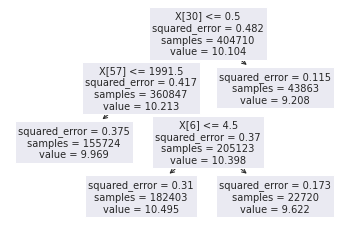

In [ ]:
plot_tree(m)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


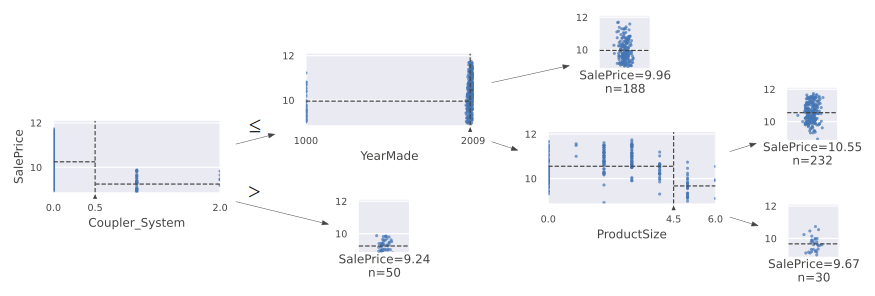

In [ ]:
samp_idx = np.random.permutation(len(y))[:500]
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')

In [61]:
# обработка выбросов, связанных с годом выпуска
xs.loc[xs['YearMade']<1900, 'YearMade'] = 1950
valid_xs.loc[valid_xs['YearMade']<1900, 'YearMade'] = 1950

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


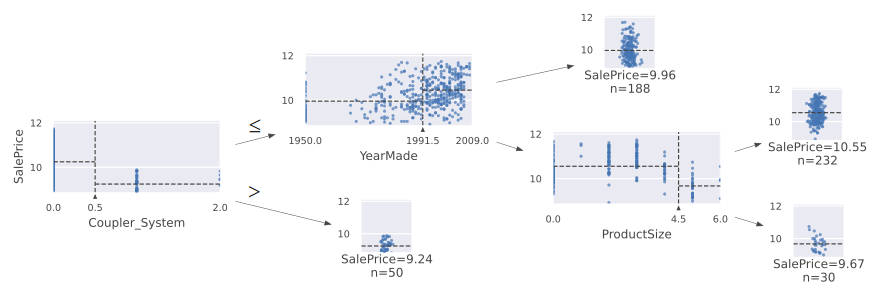

In [62]:
m = DecisionTreeRegressor(max_leaf_nodes=4).fit(xs, y)
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
orientation='LR')

In [63]:
# обучение более продвинутой модели (без ораничений на количество ветвлений)
m = DecisionTreeRegressor()

In [64]:
m.fit(xs, y)

DecisionTreeRegressor()

In [65]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [66]:
m_rmse(m, xs, y)

0.0

In [67]:
m_rmse(m, valid_xs, valid_y)

0.335438

In [68]:
m.get_n_leaves(), len(xs)

(324537, 404710)

In [69]:
m = DecisionTreeRegressor(min_samples_leaf=25)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.248588, 0.323169)

### Создание случайного леса

In [71]:
def rf(xs, y, n_estimators=40, max_samples=200_000,
max_features=0.5, min_samples_leaf=5, **kwargs):

    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
           max_samples=max_samples, max_features=max_features,
           min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [72]:
m = rf(xs, y)

In [73]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.171251, 0.233429)